In [2]:
import pandas as pd 
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("DSI_kickstarterscrape_dataset.csv", encoding = 'Latin1')
df.head()


,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


# <center>  Question 1
## <font color="red">What are the most popular categories for campaign? and Which states has the most campaigns?</font>  </center>



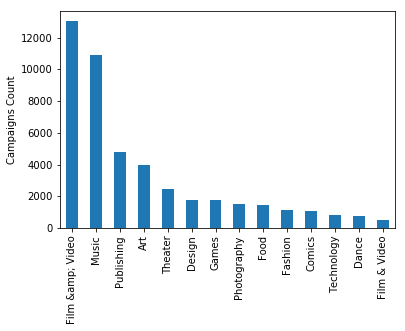

In [4]:
df.category.value_counts().plot(kind='bar')
plt.ylabel('Campaigns Count')
plt.show()

The graph above shows categories with most number of campaigns, here we see Film, Music and publishing tops the list. but this does not answer our question, these categories seems popular among kickstarters. but in order to find popular categories among kickstarters and visitors we will have to dig little bit more.

Axes(0.125,0.125;0.775x0.755)


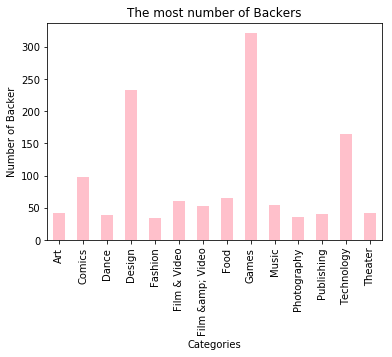

In [93]:
print(df.groupby('category').backers.mean().plot(kind = 'bar', color = 'pink'))
plt.title('The most number of Backers')
plt.xlabel('Categories')
plt.ylabel('Number of Backer')
plt.show()

Graph above represent categories and number of backers, and we can clearly see  <b> Design, Games and Technology </b> tops the list. They attracted most number of Backers. Below lets just which categories recevied the most fund.

In [94]:
df.groupby('category').pledged.mean()



category
Art                  2712.840431
Comics               5065.365079
Dance                2626.772668
Design              20021.925779
Fashion              2546.425176
Film & Video         5163.861446
Film &amp; Video     4750.919764
Food                 5165.242530
Games               15239.981567
Music                3666.751764
Photography          2564.081902
Publishing           2398.671069
Technology          13623.771323
Theater              3025.339486
Name: pledged, dtype: float64

<b> Design, Games and Technology </b> tops the list again, as they received the most funds. but it does not say weather these were the most successful categories. In order to see which category had the most successful campaigns we have to group them by their status, where True will equals Successful campaign and False will equal a Failed campaign, we will exclude live campaigns.

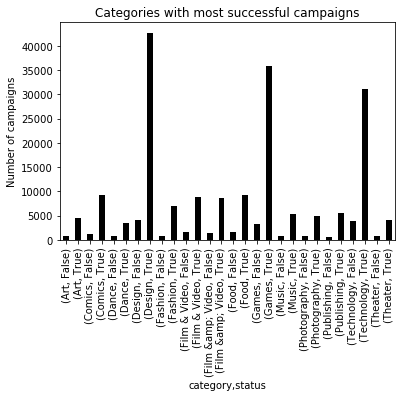

In [84]:
value = (df['status'] == 'successful') & (df['status'] != 'live')
df.groupby(['category', value]).pledged.mean().plot(kind='bar', color = 'black', width = .5)
plt.title('Categories with most successful campaigns')
plt.ylabel('Number of campaigns')
plt.show()


Graph above shows categories with most number of successful campaigns, and <b> Design tops the list followed by Games, and Technology.</b> Now, we need to see why these categories tops the list what do they have in common?

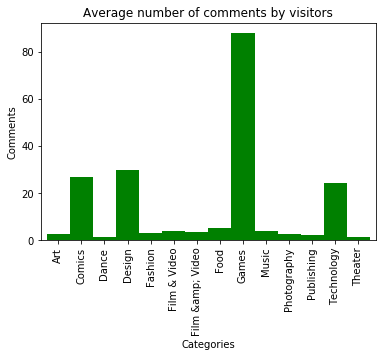

In [129]:
df.groupby('category').comments.mean().plot(kind = 'bar', color = 'green', width = 1)
plt.title('Average number of comments by visitors')
plt.ylabel('Comments')
plt.xlabel('Categories')
plt.show()

<b> Games tops the list followed by Design, comics and Technology. So answer to the question, As shown by the graphs above we are pretty to safe to say Design, Games and Technology are the most popular categories.</b>

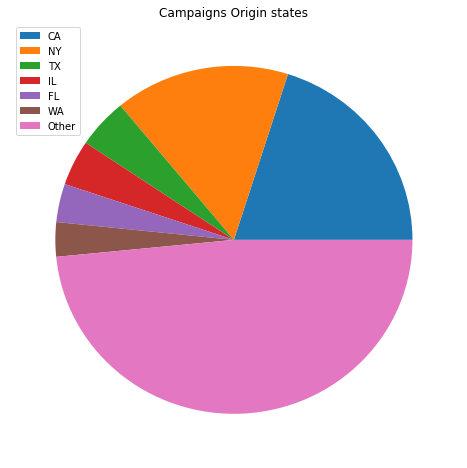

In [103]:
locations = df.location.str.split(',', 1).tolist()
locations = [x for x in locations  if str(x) != 'nan' ]
states = []
for entry in locations:
    c = entry[-1]
    c = c.strip()
    states.append(c)
states = pd.DataFrame(states, columns=['state'])
cntry_counts = pd.DataFrame(states.state.value_counts())
other = int(cntry_counts[6:].sum())
cntry_counts = cntry_counts[:6]
cntry_counts.loc[6] = other
cntry_counts = cntry_counts.rename(index={6: 'Other'})

plt.figure(figsize=(8, 8))
plt.pie(cntry_counts.state)
plt.title('Campaigns Origin states')
plt.legend(cntry_counts.index)
plt.show()

 <p> The pie graph above shows location with most number of campaigns. We seperated US States from the rest of the world and <b>California, New York and Texas </b> are the states with the most number of campaigns</p>

# <center>  Question 2
## <font color="red">What are the Key elements of an Successful Campaign?</font>  </center>


Below we will create a new Dataframe with only successful and failed campaigns.

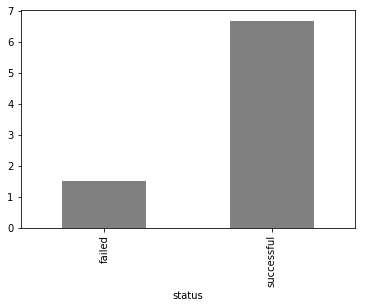

In [141]:
new_dataframe = pd.DataFrame()
success_failed = (df['status'] == 'successful') | (df['status'] == 'failed')
new_dataframe = df[success_failed].copy()
new_dataframe.groupby('status').updates.mean().plot(kind = 'bar', color = 'grey')
plt.show()

Graph above shows Average number of updates by kickstarters. Updates are essential, kickstarter usually send updates about their campaigns. Above we see Successful Campaigns have more updates than failed campaigns.

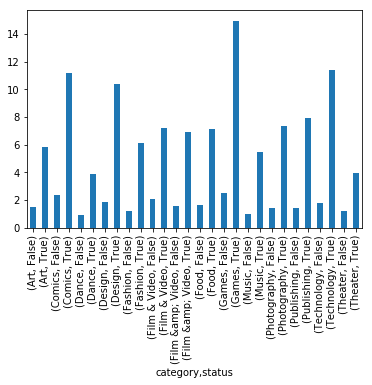

In [158]:
check = (new_dataframe['status'] == 'successful')
new_dataframe.groupby(['category', check]).updates.mean().plot(kind = 'bar')
plt.show()

Successful Campaigns have more updates than failed campaigns, so Frequent updates is one the key to successful campaign.


# <center>  Question 3
## <font color="red">Is there an ideal month/day/time to launch a campaign?</font>  </center>
